In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# Load data dari file Excel

# Skin, jarak 4cm, rata-rata 5 sampel data
dfS4 = pd.read_excel('skin65.xlsx', usecols=['t', 'S4'])

# Skin, jarak 3cm, rata-rata 5 sampel data
dfS3 = pd.read_excel('skin65.xlsx', usecols=['t', 'S3'])

# Extract data dari kolom masing-masing sampel
time = dfS4['t'].to_numpy()
S4_signal_data = dfS4['S4'].to_numpy()

time = dfS4['t'].to_numpy()
S3_signal_data = dfS3['S3'].to_numpy()


# SKIN 65 % Jarak 4 cm

## Parameter Filter, Apply Bandpass, Rectify Signal untuk rata-rata sampel 4 cm

In [3]:
# S4 (Skin, 4 cm rata2 dari 5 sampel) 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S4_filtered_signal = signal.filtfilt(b, a, S4_signal_data)

# Rectify the signal (take only the positive values)
S4_rectified_signal = np.abs(S4_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [4]:
# S4
# Perform Fourier transform
S4_signal_fft = np.fft.fft(S4_filtered_signal)
S4_signal_freq = np.fft.fftfreq(len(S4_filtered_signal), 1/fs)

# Perform one-sided FFT (discard negative frequencies)
S4_n = len(S4_filtered_signal)
S4_freq = S4_signal_freq[0:int(S4_n/2)]
S4_fft_amp = np.abs(S4_signal_fft)[0:int(S4_n/2)]/S4_n*2

# Perform power spectral density (PSD) calculation
S4_psd = (1/(fs*S4_n)) * np.square(np.abs(S4_signal_fft[:S4_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S4_freq_psd = S4_signal_freq[0:int(S4_n/2)]
S4_psd_one_sided = S4_psd[0:int(S4_n/2)]

## Plot Sinyal

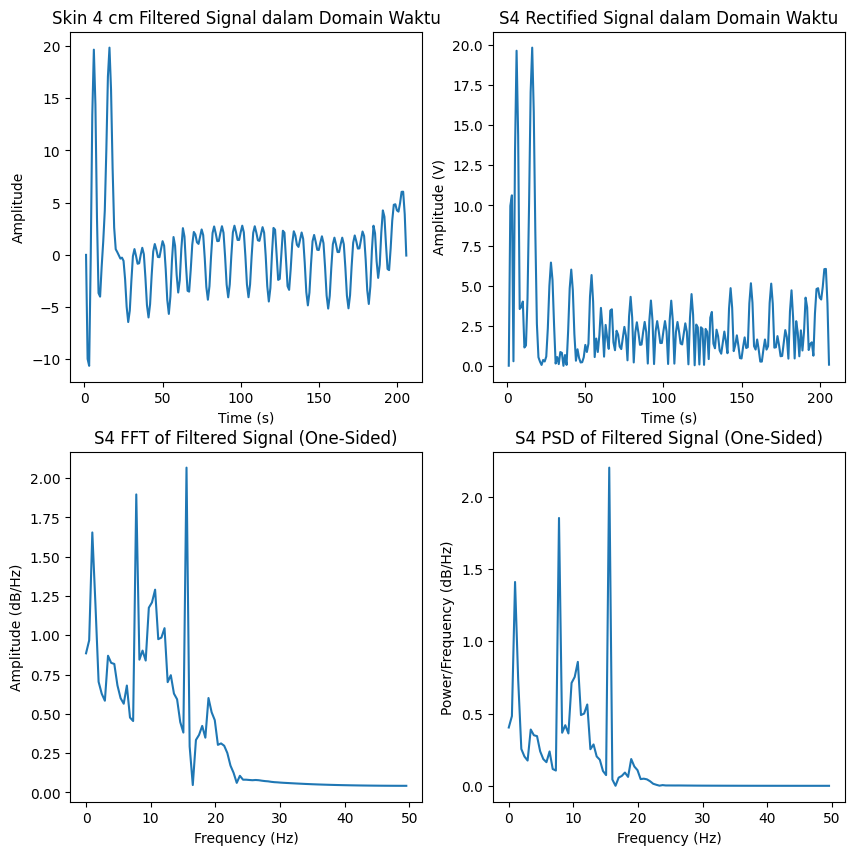

In [5]:
# S4
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S4_filtered_signal)
axs[0, 0].set_title('Skin 4 cm Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, S4_rectified_signal)
axs[0, 1].set_title('S4 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(S4_freq, S4_fft_amp)
axs[1, 0].set_title('S4 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude (dB/Hz)')

axs[1, 1].plot(S4_freq_psd, S4_psd_one_sided)
axs[1, 1].set_title('S4 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

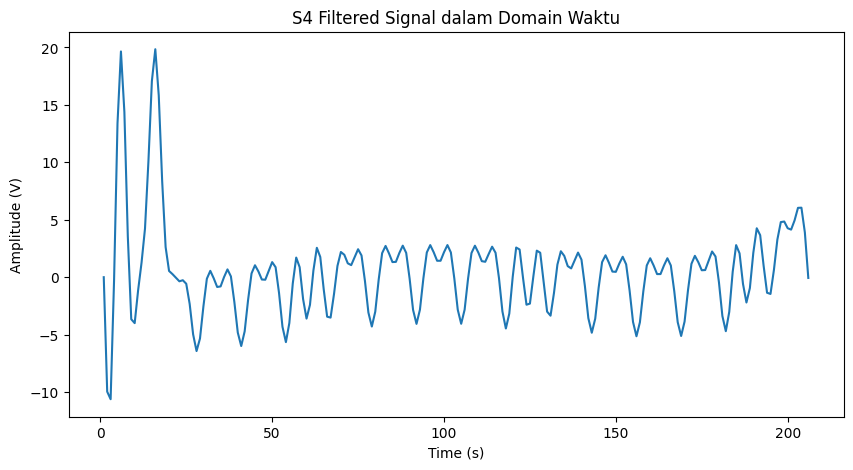

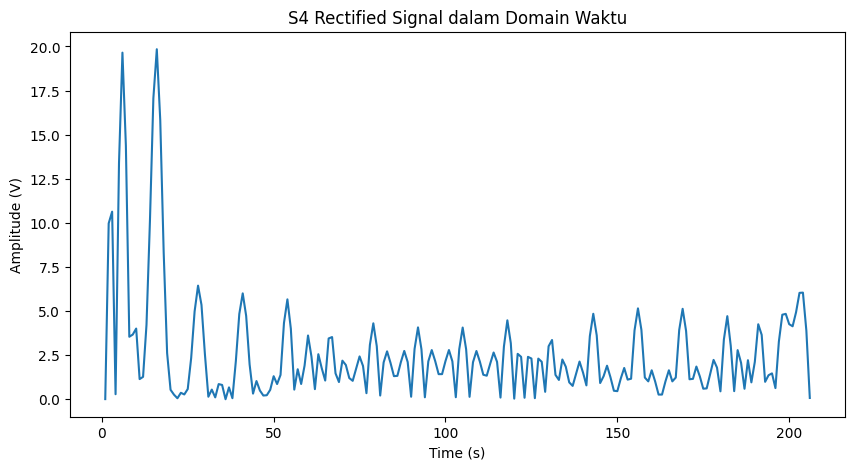

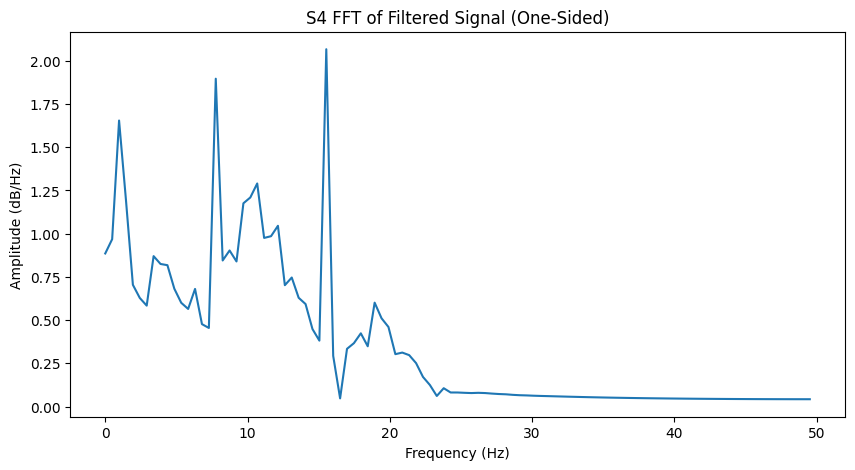

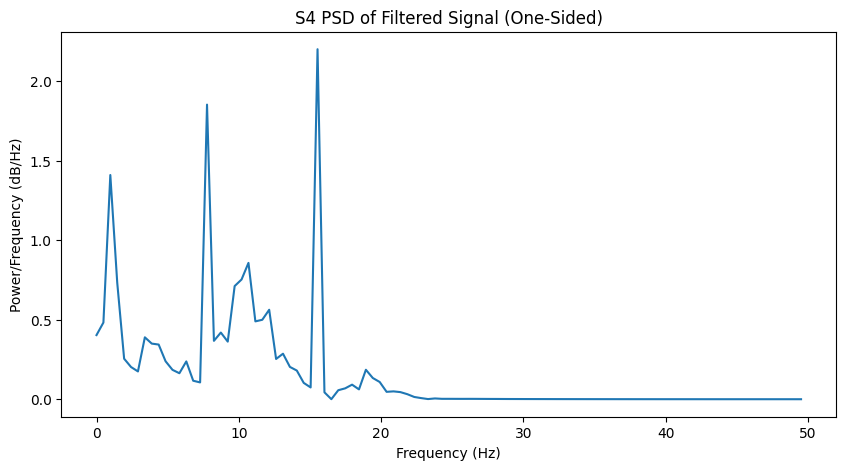

In [6]:
plt.figure(figsize=(10,5))
plt.plot(time, S4_filtered_signal)
plt.title('S4 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')


plt.figure(figsize=(10,5))
plt.plot(time, S4_rectified_signal)
plt.title('S4 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')


plt.figure(figsize=(10,5))
plt.plot(S4_freq, S4_fft_amp)
plt.title('S4 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB/Hz)')


plt.figure(figsize=(10,5))
plt.plot(S4_freq_psd, S4_psd_one_sided)
plt.title('S4 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

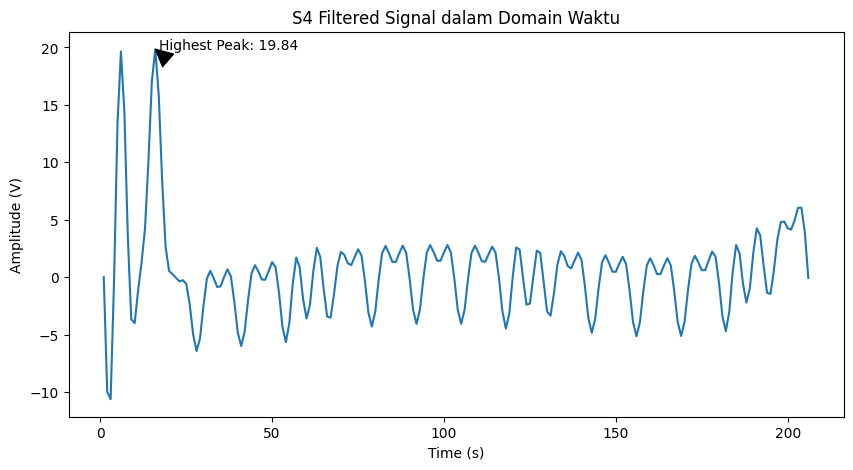

In [7]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S4_filtered_signal)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S4_filtered_signal[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time, S4_filtered_signal)
plt.annotate(f'Highest Peak: {S4_filtered_signal[highest_peak]:.2f}', 
             xy=(time[highest_peak], 
                 S4_filtered_signal[highest_peak]),
             xytext=(time[highest_peak]+1, S4_filtered_signal[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S4 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

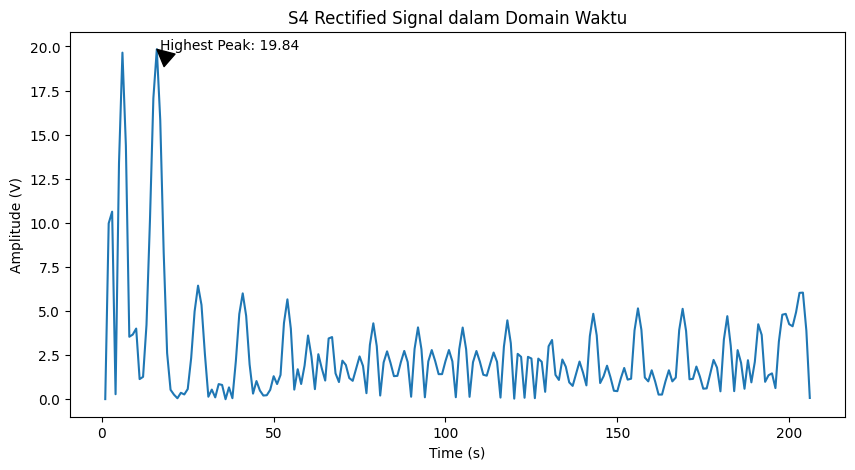

In [8]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S4_rectified_signal)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S4_rectified_signal[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time, S4_rectified_signal)
plt.annotate(f'Highest Peak: {S4_rectified_signal[highest_peak]:.2f}', 
             xy=(time[highest_peak], 
                 S4_rectified_signal[highest_peak]),
             xytext=(time[highest_peak]+1, S4_rectified_signal[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S4 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

Text(0, 0.5, 'Amplitude (dB/Hz)')

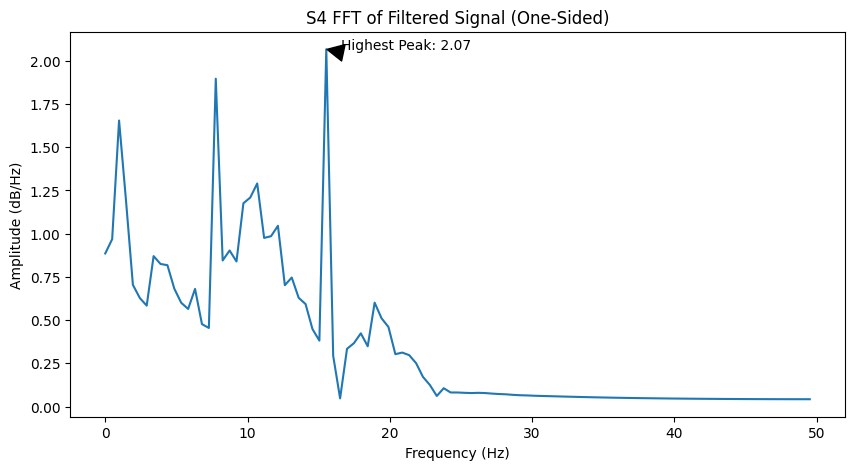

In [9]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S4_fft_amp)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S4_fft_amp[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(S4_freq, S4_fft_amp)
plt.annotate(f'Highest Peak: {S4_fft_amp[highest_peak]:.2f}', 
             xy=(S4_freq[highest_peak], 
                 S4_fft_amp[highest_peak]),
             xytext=(S4_freq[highest_peak]+1, S4_fft_amp[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S4 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB/Hz)')

<function matplotlib.pyplot.show(close=None, block=None)>

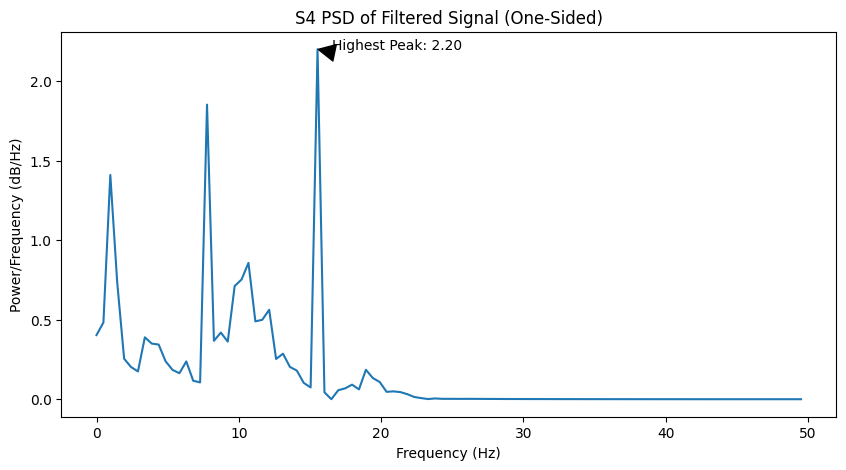

In [10]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S4_psd_one_sided)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S4_psd_one_sided[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(S4_freq_psd, S4_psd_one_sided)
plt.annotate(f'Highest Peak: {S4_psd_one_sided[highest_peak]:.2f}', 
             xy=(S4_freq_psd[highest_peak], 
                 S4_psd_one_sided[highest_peak]),
             xytext=(S4_freq_psd[highest_peak]+1, S4_psd_one_sided[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S4 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

# SKIN 65 % Jarak 3 cm


## Parameter Filter, Apply Bandpass, Rectify Signal untuk rata-rata sampel 3 cm

In [11]:
# S31 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
S3_filtered_signal = signal.filtfilt(b, a, S3_signal_data)

# Rectify the signal (take only the positive values)
S3_rectified_signal = np.abs(S3_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [12]:
# S3
# Perform Fourier Transform
S3_signal_fft = np.fft.fft(S3_filtered_signal)
S3_signal_freq = np.fft.fftfreq(len(S3_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
S3_n = len(S3_filtered_signal)
S3_freq = S3_signal_freq[0:int(S3_n/2)]
S3_fft_amp = np.abs(S3_signal_fft)[0:int(S3_n/2)]/S3_n*2

# Perform power spectral density (PSD) calculation
S3_psd = (1/(fs*S3_n)) * np.square(np.abs(S3_signal_fft[:S3_n//2]))

# Perform one-sided PSD (discard negative frequencies)
S3_freq_psd = S3_signal_freq[0:int(S3_n/2)]
S3_psd_one_sided = S3_psd[0:int(S3_n/2)]

# Plot

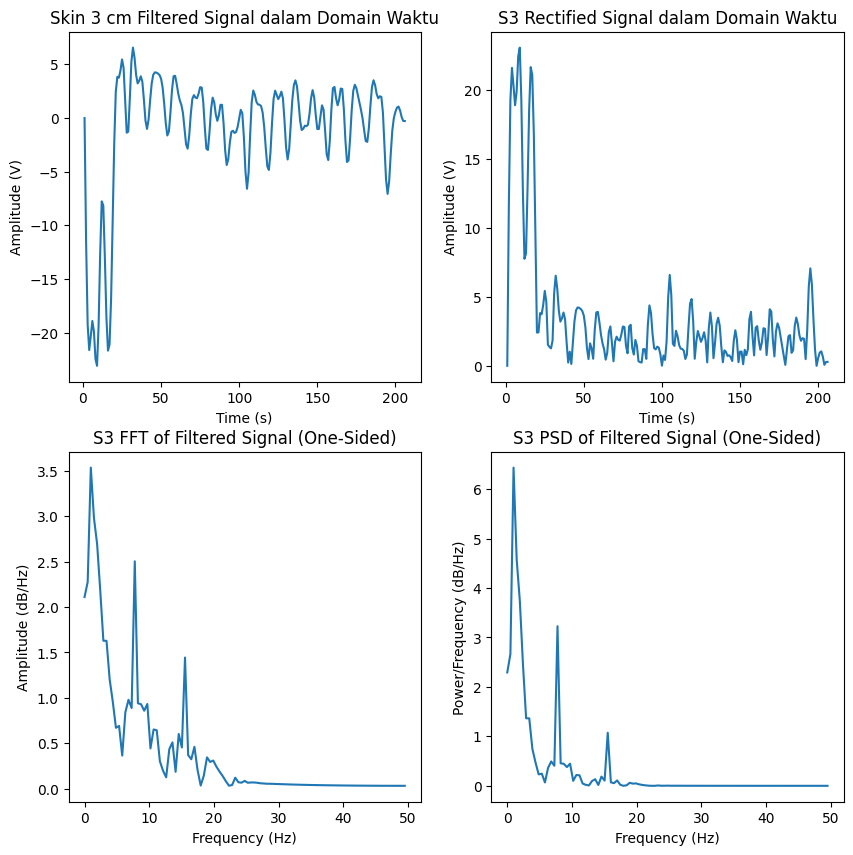

In [13]:
# S3
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, S3_filtered_signal)
axs[0, 0].set_title('Skin 3 cm Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(time, S3_rectified_signal)
axs[0, 1].set_title('S3 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(S3_freq, S3_fft_amp)
axs[1, 0].set_title('S3 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude (dB/Hz)')

axs[1, 1].plot(S3_freq_psd, S3_psd_one_sided)
axs[1, 1].set_title('S3 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

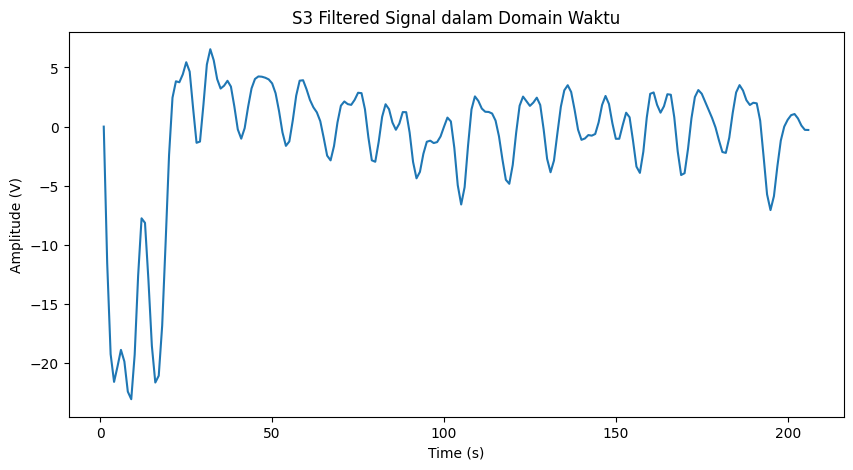

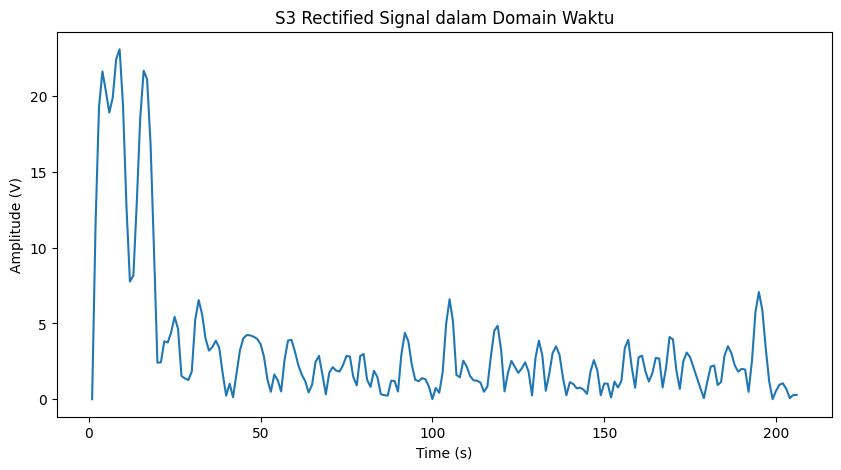

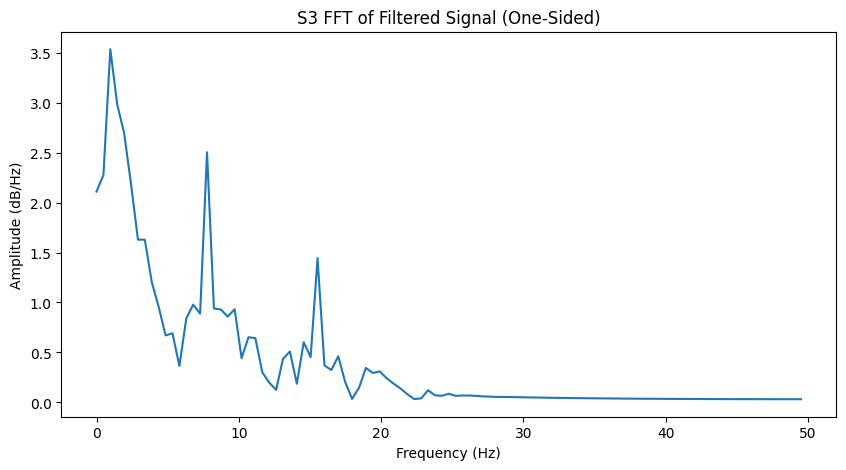

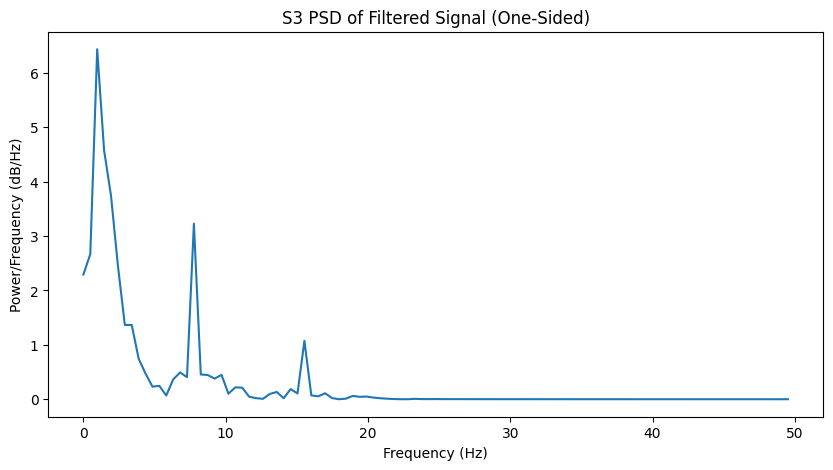

In [14]:
plt.figure(figsize=(10,5))
plt.plot(time, S3_filtered_signal)
plt.title('S3 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')


plt.figure(figsize=(10,5))
plt.plot(time, S3_rectified_signal)
plt.title('S3 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')


plt.figure(figsize=(10,5))
plt.plot(S3_freq, S3_fft_amp)
plt.title('S3 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB/Hz)')


plt.figure(figsize=(10,5))
plt.plot(S3_freq_psd, S3_psd_one_sided)
plt.title('S3 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

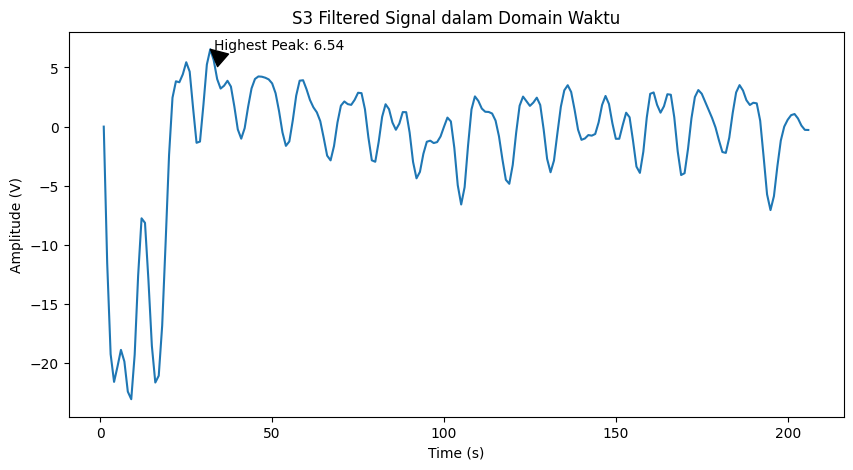

In [15]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S3_filtered_signal)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S3_filtered_signal[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time, S3_filtered_signal)
plt.annotate(f'Highest Peak: {S3_filtered_signal[highest_peak]:.2f}', 
             xy=(time[highest_peak], 
                 S3_filtered_signal[highest_peak]),
             xytext=(time[highest_peak]+1, S3_filtered_signal[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S3 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

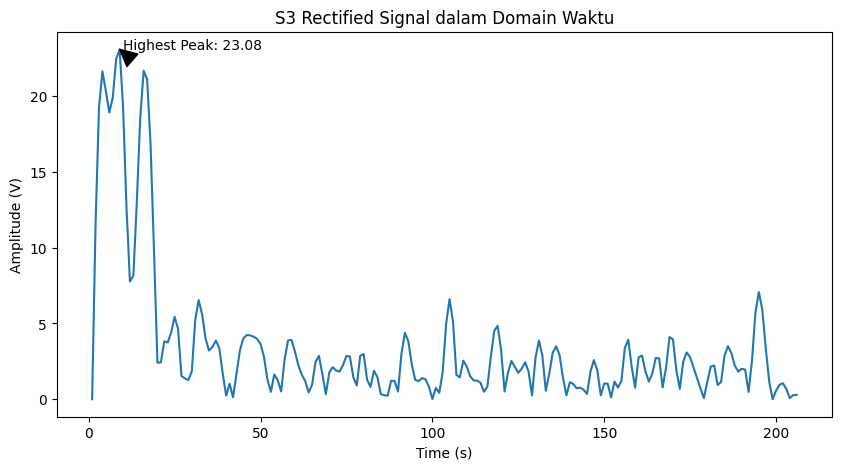

In [16]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S3_rectified_signal)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S3_rectified_signal[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time, S3_rectified_signal)
plt.annotate(f'Highest Peak: {S3_rectified_signal[highest_peak]:.2f}', 
             xy=(time[highest_peak], 
                 S3_rectified_signal[highest_peak]),
             xytext=(time[highest_peak]+1, S3_rectified_signal[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S3 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

Text(0, 0.5, 'Amplitude (dB/Hz)')

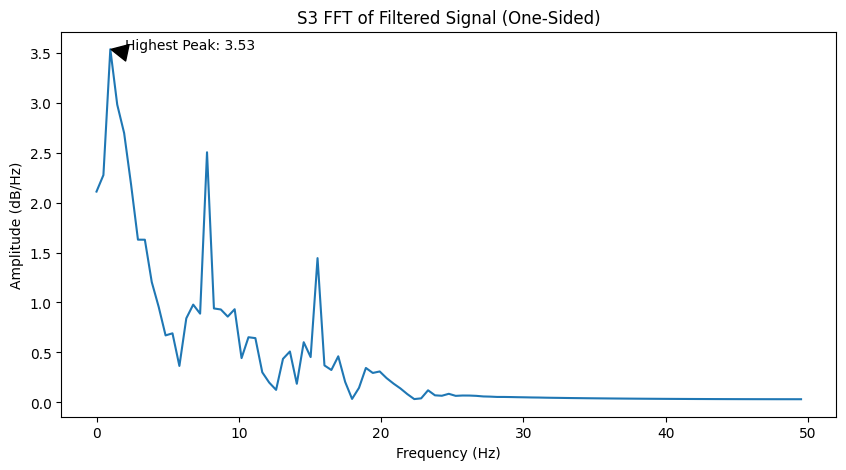

In [17]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S3_fft_amp)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S3_fft_amp[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(S3_freq, S3_fft_amp)
plt.annotate(f'Highest Peak: {S3_fft_amp[highest_peak]:.2f}', 
             xy=(S3_freq[highest_peak], 
                 S3_fft_amp[highest_peak]),
             xytext=(S3_freq[highest_peak]+1, S3_fft_amp[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S3 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB/Hz)')

<function matplotlib.pyplot.show(close=None, block=None)>

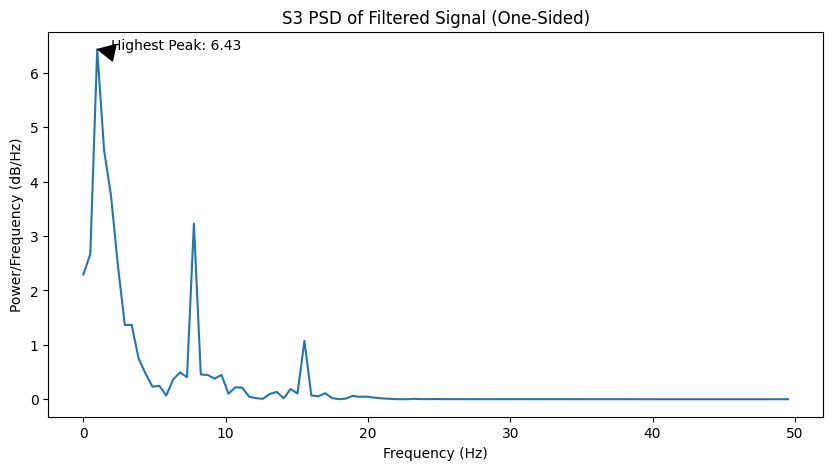

In [18]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(S3_psd_one_sided)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[S3_psd_one_sided[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(S3_freq_psd, S3_psd_one_sided)
plt.annotate(f'Highest Peak: {S3_psd_one_sided[highest_peak]:.2f}', 
             xy=(S3_freq_psd[highest_peak], 
                 S3_psd_one_sided[highest_peak]),
             xytext=(S3_freq_psd[highest_peak]+1, S3_psd_one_sided[highest_peak]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('S3 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show